### Overall Analysis:
* Happiness Score is strongly related to GDP & Health.
* Noth America is consistently the happiest region over last 3 years
* All top 5 countries over last 3 years are from Europe region
* Finland has consistently topped being the happiest country in last 3 years
* Bottom 5 countries over last 3 years are mostly from Africa Region
* Commonwealth & Europe region had no outliers over last 3 years

### Importing Required Modules

In [1]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

### Read CSV Data and Store in DataFrame

In [2]:
# Read file and store it in DataFrame
orig_data_2018 = pd.read_csv("Resource/2018.csv")
orig_data_2019 = pd.read_csv("Resource/2019.csv")
orig_data_2020 = pd.read_csv("Resource/2020.csv")



# Get only required columns from dataframe
data_2018 = orig_data_2018[["Country or region", "Score", "GDP per capita", "Healthy life expectancy", 
                            "Perceptions of corruption"]]

# Rename Columns so they are uniform across all years
data_2018 = data_2018.rename(columns={"Country or region" : "Country",
                                      "Healthy life expectancy" : "Health",
                                      "GDP per capita" : "GDP_per_Capita",
                                      "Perceptions of corruption" : "Corruption"})

# Get only required columns from dataframe
data_2019 = orig_data_2019[["Country or region", "Score", "GDP per capita", "Healthy life expectancy",
                            "Perceptions of corruption"]]

# Rename Columns so they are uniform across all years
data_2019 = data_2019.rename(columns={"Country or region" : "Country",
                                      "Healthy life expectancy" : "Health",
                                      "GDP per capita" : "GDP_per_Capita",
                                      "Perceptions of corruption" : "Corruption"
                                      })

# Get only required columns from dataframe
data_2020 = orig_data_2020[["Country name", "Regional indicator", "Ladder score", "Logged GDP per capita",
                            "Healthy life expectancy", "Perceptions of corruption"]]

# Rename Columns so they are uniform across all years
data_2020 = data_2020.rename(columns = {"Country name" : "Country",
                                        "Regional indicator" : "Region",
                                        "Ladder score" : "Score",
                                        "Logged GDP per capita" : "GDP_per_Capita",
                                        "Healthy life expectancy" : "Health",
                                        "Perceptions of corruption" : "Corruption"})



### Data Cleanup
* Merge all three DF into one DF
* Get average of Score, GDP, Health, Corruption for all years
* Recategorize Region 

In [3]:
# Merge all three DF to one by adding suffixes
merged_data = pd.merge(pd.merge(data_2020,data_2019,on = "Country", how="inner", suffixes=[None,'_2019']),
                       data_2018,on = "Country", how="inner" ,suffixes=['_2020','_2018'])

# Display merged Data Frame
merged_data

,Country,Region,Score_2020,GDP_per_Capita_2020,Health_2020,Corruption_2020,Score_2019,GDP_per_Capita_2019,Health_2019,Corruption_2019,Score_2018,GDP_per_Capita_2018,Health_2018,Corruption_2018
0,Finland,Western Europe,7.8087,10.639267,71.900825,0.195445,7.769,1.340,0.986,0.393,7.632,1.305,0.874,0.393
1,Denmark,Western Europe,7.6456,10.774001,72.402504,0.168489,7.600,1.383,0.996,0.410,7.555,1.351,0.868,0.408
2,Switzerland,Western Europe,7.5599,10.979933,74.102448,0.303728,7.480,1.452,1.052,0.343,7.487,1.420,0.927,0.357
3,Iceland,Western Europe,7.5045,10.772559,73.000000,0.711710,7.494,1.380,1.026,0.118,7.495,1.343,0.914,0.138
4,Norway,Western Europe,7.4880,11.087804,73.200783,0.263218,7.554,1.488,1.028,0.341,7.594,1.456,0.861,0.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,45.200001,0.891807,3.083,0.026,0.105,0.035,3.083,0.024,0.010,0.038
140,Rwanda,Sub-Saharan Africa,3.3123,7.600104,61.098846,0.183541,3.334,0.359,0.614,0.411,3.408,0.332,0.400,0.444
141,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,55.617260,0.810237,3.663,0.366,0.433,0.089,3.692,0.357,0.248,0.099
142,South Sudan,Sub-Saharan Africa,2.8166,7.425360,51.000000,0.763417,2.853,0.306,0.295,0.091,3.254,0.337,0.177,0.106


In [4]:
# Check if there are any missing values in dataframe
merged_data.count()

Country                144
Region                 144
Score_2020             144
GDP_per_Capita_2020    144
Health_2020            144
Corruption_2020        144
Score_2019             144
GDP_per_Capita_2019    144
Health_2019            144
Corruption_2019        144
Score_2018             144
GDP_per_Capita_2018    144
Health_2018            144
Corruption_2018        143
dtype: int64

In [5]:
# Replace empty cell value with NaN
merged_data = merged_data.replace('', np.nan, regex=True)

# Drop any rows which contains NaN values
merged_data = merged_data.dropna(how='any')

# Re-verify if values are consistent
merged_data.count()

Country                143
Region                 143
Score_2020             143
GDP_per_Capita_2020    143
Health_2020            143
Corruption_2020        143
Score_2019             143
GDP_per_Capita_2019    143
Health_2019            143
Corruption_2019        143
Score_2018             143
GDP_per_Capita_2018    143
Health_2018            143
Corruption_2018        143
dtype: int64

In [6]:
# Get the unique region names 
merged_data["Region"].unique()

# Combine (Rename) all regions which has divided into multiple regions for example rename regions 
# "South Asia" & "Southeast Asia" as "Asia"
merged_data = merged_data.replace({"Region" : { "Central and Eastern Europe" : "Europe", 
                                                 "East Asia" : "Asia",
                                                 "Middle East and North Africa" : "Africa",
                                                 "South Asia" : "Asia",
                                                 "Southeast Asia" : "Asia",
                                                 "Sub-Saharan Africa" : "Africa",
                                                 "Western Europe" : "Europe",
                                                 "Commonwealth of Independent States" : "Commonwealth",
                                                 "North America and ANZ" : "N. America",
                                                 "Latin America and Caribbean" : "S. America"
                                                }
                                   })

# Display unique region names
merged_data["Region"].unique()

array(['Europe', 'N. America', 'Africa', 'S. America', 'Asia',
       'Commonwealth'], dtype=object)

In [7]:
# Display final Data Frame
merged_data

,Country,Region,Score_2020,GDP_per_Capita_2020,Health_2020,Corruption_2020,Score_2019,GDP_per_Capita_2019,Health_2019,Corruption_2019,Score_2018,GDP_per_Capita_2018,Health_2018,Corruption_2018
0,Finland,Europe,7.8087,10.639267,71.900825,0.195445,7.769,1.340,0.986,0.393,7.632,1.305,0.874,0.393
1,Denmark,Europe,7.6456,10.774001,72.402504,0.168489,7.600,1.383,0.996,0.410,7.555,1.351,0.868,0.408
2,Switzerland,Europe,7.5599,10.979933,74.102448,0.303728,7.480,1.452,1.052,0.343,7.487,1.420,0.927,0.357
3,Iceland,Europe,7.5045,10.772559,73.000000,0.711710,7.494,1.380,1.026,0.118,7.495,1.343,0.914,0.138
4,Norway,Europe,7.4880,11.087804,73.200783,0.263218,7.554,1.488,1.028,0.341,7.594,1.456,0.861,0.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Central African Republic,Africa,3.4759,6.625160,45.200001,0.891807,3.083,0.026,0.105,0.035,3.083,0.024,0.010,0.038
140,Rwanda,Africa,3.3123,7.600104,61.098846,0.183541,3.334,0.359,0.614,0.411,3.408,0.332,0.400,0.444
141,Zimbabwe,Africa,3.2992,7.865712,55.617260,0.810237,3.663,0.366,0.433,0.089,3.692,0.357,0.248,0.099
142,South Sudan,Africa,2.8166,7.425360,51.000000,0.763417,2.853,0.306,0.295,0.091,3.254,0.337,0.177,0.106


### Question 1 : How does happiness relates on different factors : GDP, Health & Corruption

### Analysis:
* Happiness score is strongly related to GDP based off of r-value.
* Happiness score is strongly related to Health based off of r-value.
* Happiness score increases as GDP & Health increases.
* Happiness score is not related to corruption based off of r-value. Looks like people are not that much concern about corruption.
* Corelation of GDP, Health to happiness score is almost same across last 3 years.

In [8]:
# Defined method to calculate linear regression, parameters as below:
# ax = subplot name
# x_values = series/column values to plot on x-axis
# y_values = series/column values to plot on y-axis
# ylabel = string to display as y-label
# eqplace = location to place equation on plot

def score_linear(ax, x_values, y_values, ylabel, eqplace):
      
    # Get the linear equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot the scatter plot
    ax.scatter(x_values,y_values, edgecolors="black", facecolors="purple", s=100)
    ax.plot(x_values,regress_values,"r-")
    
    # Annotate the line_equation on graph
    ax.annotate(line_eq,eqplace,fontsize=15,color="blue",fontweight="bold")
    
    # Set label for x & y axis and xlim
    ax.set_xlabel("Happiness Score", labelpad=30, fontsize=20)
    ax.set_ylabel(ylabel, labelpad=10, fontsize=20)
    ax.set_xlim(2,8)
    
    
    # Print r-value
    print(f"The r-value for {ylabel} is : {rvalue}")

The r-value for GDP Per Capita is : 0.7803058524869457
The r-value for Health is : 0.7866048436107645
The r-value for Corruption is : -0.43026737412953575


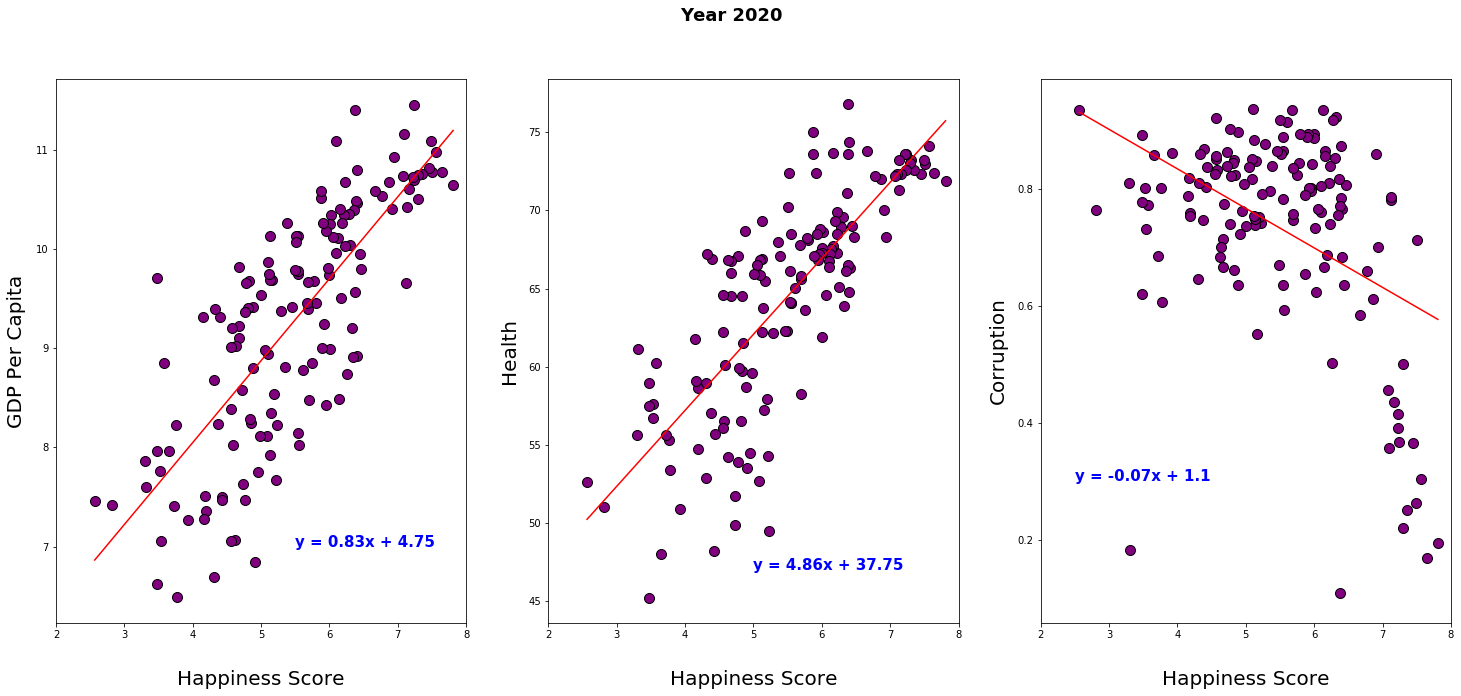

In [9]:
# Create a figure with 1 row and 3 columns, set figure size
fig1,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25,10))

# Set the figure title
fig1.suptitle('Year 2020', fontsize=18, fontweight='bold')

# Call method score_linear by providing required parameters to plot linear regression

# Happiness score vs GDP for year 2020:
score_linear(ax1, merged_data["Score_2020"], merged_data["GDP_per_Capita_2020"], "GDP Per Capita", (5.5, 7))
# Happiness score vs Health for year 2020:
score_linear(ax2, merged_data["Score_2020"], merged_data["Health_2020"], "Health", (5, 47))
# Happiness score vs Corruption for year 2020:
score_linear(ax3, merged_data["Score_2020"], merged_data["Corruption_2020"], "Corruption", (2.5, 0.3))

# Save fig
fig1.savefig("Plot_Images/2020_regression")

# Display Plot
plt.show()

The r-value for GDP Per Capita is : 0.8012042082191385
The r-value for Health is : 0.7950662928800899
The r-value for Corruption is : 0.42308551500872704


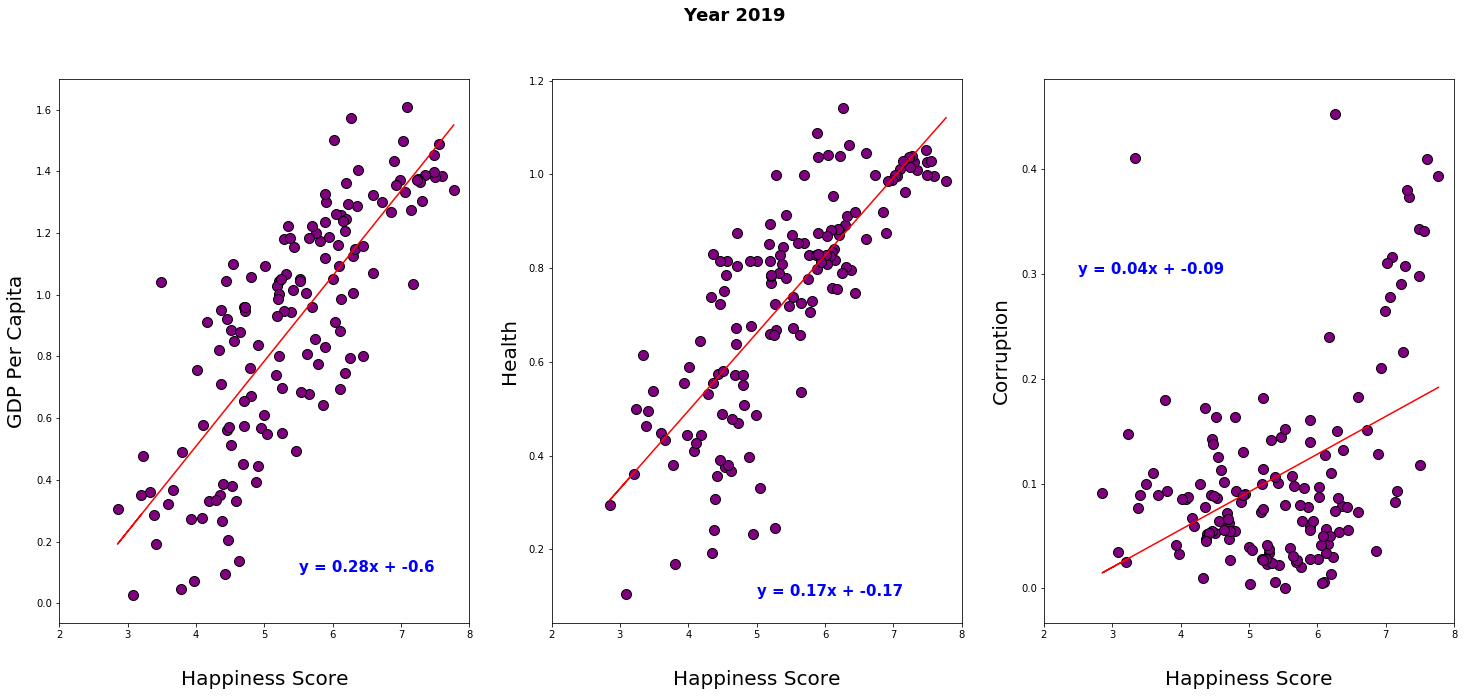

In [10]:
# Create a figure with 1 row and 3 columns, set figure size
fig1,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25,10))

# Set the figure title
fig1.suptitle('Year 2019', fontsize=18, fontweight='bold')

# Call method score_linear by providing required parameters to plot linear regression

# Happiness score vs GDP for year 2019:
score_linear(ax1, merged_data["Score_2019"], merged_data["GDP_per_Capita_2019"], "GDP Per Capita", (5.5, 0.1))
# Happiness score vs Health for year 2019:
score_linear(ax2, merged_data["Score_2019"], merged_data["Health_2019"], "Health", (5, 0.1))
# Happiness score vs Corruption for year 2019:
score_linear(ax3, merged_data["Score_2019"], merged_data["Corruption_2019"], "Corruption", (2.5, 0.3))

# Save fig
fig1.savefig("Plot_Images/2019_regression")

# Display Plot
plt.show()

The r-value for GDP Per Capita is : 0.8267674298914323
The r-value for Health is : 0.7968283105259638
The r-value for Corruption is : 0.43477457143982645


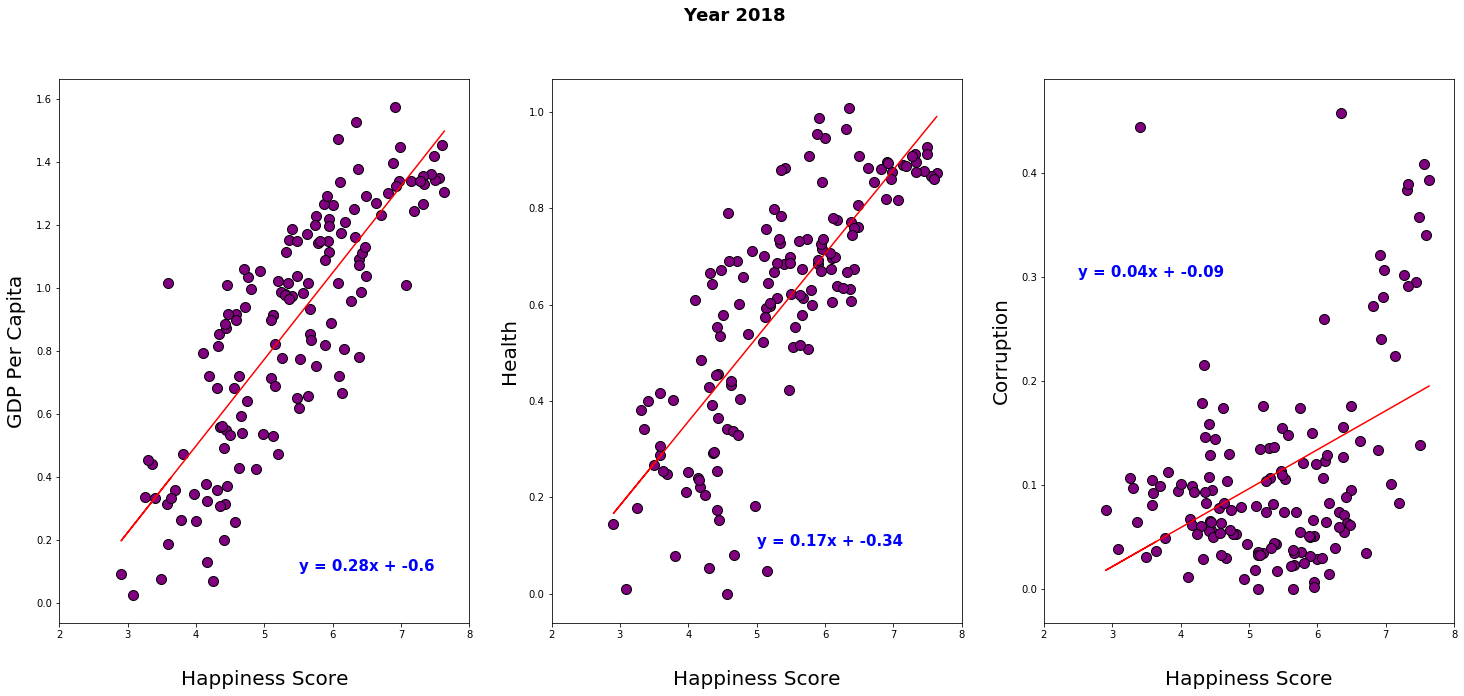

In [11]:
# Create a figure with 1 row and 3 columns, set figure size
fig1,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25,10))

# Set the figure title
fig1.suptitle('Year 2018', fontsize=18, fontweight='bold')

# Call method score_linear by providing required parameters to plot linear regression

# Happiness score vs GDP for year 2018:
score_linear(ax1, merged_data["Score_2018"], merged_data["GDP_per_Capita_2018"], "GDP Per Capita", (5.5, 0.1))
# Happiness score vs Health for year 2018:
score_linear(ax2, merged_data["Score_2018"], merged_data["Health_2018"], "Health", (5, 0.1))
# Happiness score vs Corruption for year 2018:
score_linear(ax3, merged_data["Score_2018"], merged_data["Corruption_2018"], "Corruption", (2.5, 0.3))

# Save fig
fig1.savefig("Plot_Images/2018_regression")

# Display Plot
plt.show()

### Question 2: What are the top 5 & bottom 5 countries in regards with happiness Score? Are there any similarities in demographics in top 5 and Bottom 5 countries?

### Analysis:
* All top 5 countries are from Europe region for all 3 years
* Finland maintained its position of the most happiest country all over years
* Most of Bottom 5 countries are from Africa region over all 3 years
* Could not comapre similarities in terms of demographics as health measures are different in year 2020 compare to 2018 & 2019
* For top 5 countries in year 2018 & 2019 there is not much differnce between Health & GDP demographics
* Looking at bottom 5 countries in year 2018 & 2019, looks like country Central African Republic is an exception as its demographics are lower than that of the bottom most country still it has greater happiness score.

#### Top 5 countries

In [12]:
# Sort the data frame by Happiness score in particular year in descending order to get the top 5 countries for that year.
top_5_2020 = merged_data.sort_values(by=["Score_2020"], ascending=False).head(5)
top_5_2019 = merged_data.sort_values(by=["Score_2019"], ascending=False).head(5)
top_5_2018 = merged_data.sort_values(by=["Score_2018"], ascending=False).head(5)

# Get only required columns in dataframe
top_5_2020 = top_5_2020[["Country", "Region", "Score_2020", "GDP_per_Capita_2020", "Health_2020", "Corruption_2020"]]
top_5_2019 = top_5_2019[["Country", "Region", "Score_2019", "GDP_per_Capita_2019", "Health_2019", "Corruption_2019"]]
top_5_2018 = top_5_2018[["Country", "Region", "Score_2018", "GDP_per_Capita_2018", "Health_2018", "Corruption_2018"]]

# Display top 5 countries for year 2020
top_5_2020

,Country,Region,Score_2020,GDP_per_Capita_2020,Health_2020,Corruption_2020
0,Finland,Europe,7.8087,10.639267,71.900825,0.195445
1,Denmark,Europe,7.6456,10.774001,72.402504,0.168489
2,Switzerland,Europe,7.5599,10.979933,74.102448,0.303728
3,Iceland,Europe,7.5045,10.772559,73.000000,0.711710
4,Norway,Europe,7.4880,11.087804,73.200783,0.263218


In [13]:
# Display top 5 countries for year 2019
top_5_2019

,Country,Region,Score_2019,GDP_per_Capita_2019,Health_2019,Corruption_2019
0,Finland,Europe,7.769,1.340,0.986,0.393
1,Denmark,Europe,7.600,1.383,0.996,0.410
4,Norway,Europe,7.554,1.488,1.028,0.341
3,Iceland,Europe,7.494,1.380,1.026,0.118
5,Netherlands,Europe,7.488,1.396,0.999,0.298


In [14]:
# Display top 5 countries for year 2018
top_5_2018

,Country,Region,Score_2018,GDP_per_Capita_2018,Health_2018,Corruption_2018
0,Finland,Europe,7.632,1.305,0.874,0.393
4,Norway,Europe,7.594,1.456,0.861,0.340
1,Denmark,Europe,7.555,1.351,0.868,0.408
3,Iceland,Europe,7.495,1.343,0.914,0.138
2,Switzerland,Europe,7.487,1.420,0.927,0.357


In [15]:
# Method to plot stacked bar graph to display distribution of demographics for each year
# ax = subplot
# ax_title = subplot title
# x_value = x-axis values(ticks), which is top 5 country names for particular year
# y_value1 = y-axis values, which is Health score
# y_value2 = y-axis values, which is GDP score
# y_value3 = y-axis values, which is Corruption score
# max_yticks = float/int, max y limit
# spacing = float/integer, interval value to place y values on axis

def year_stackBar(ax, ax_title, x_value, y_value1, y_value2, y_value3, max_yticks, spacing):

    # Plot the stacked bar graph 
    p1 = ax.bar(x_value, y_value1, color='turquoise', edgecolor='white', width=0.5)
    p2 = ax.bar(x_value, y_value2, color='goldenrod', edgecolor='white', width=0.5, bottom = y_value1)
    p3 = ax.bar(x_value, y_value3, color='purple', edgecolor='white', width=0.5,
             bottom = y_value1 + y_value2)

    # Set the yticks, x-label & title
    ax.set_yticks(np.arange(0, max_yticks, spacing))
    ax.set_xlabel("Country", labelpad=30, fontsize=20)
    ax.set_title(ax_title, fontsize=18, fontweight='bold')
    ax.tick_params(axis='x', labelsize=20)
            
    # Add legend for the plot
    ax.legend((p1[0], p2[0], p3[0]), ('Health', 'GDP', 'Corruption'))

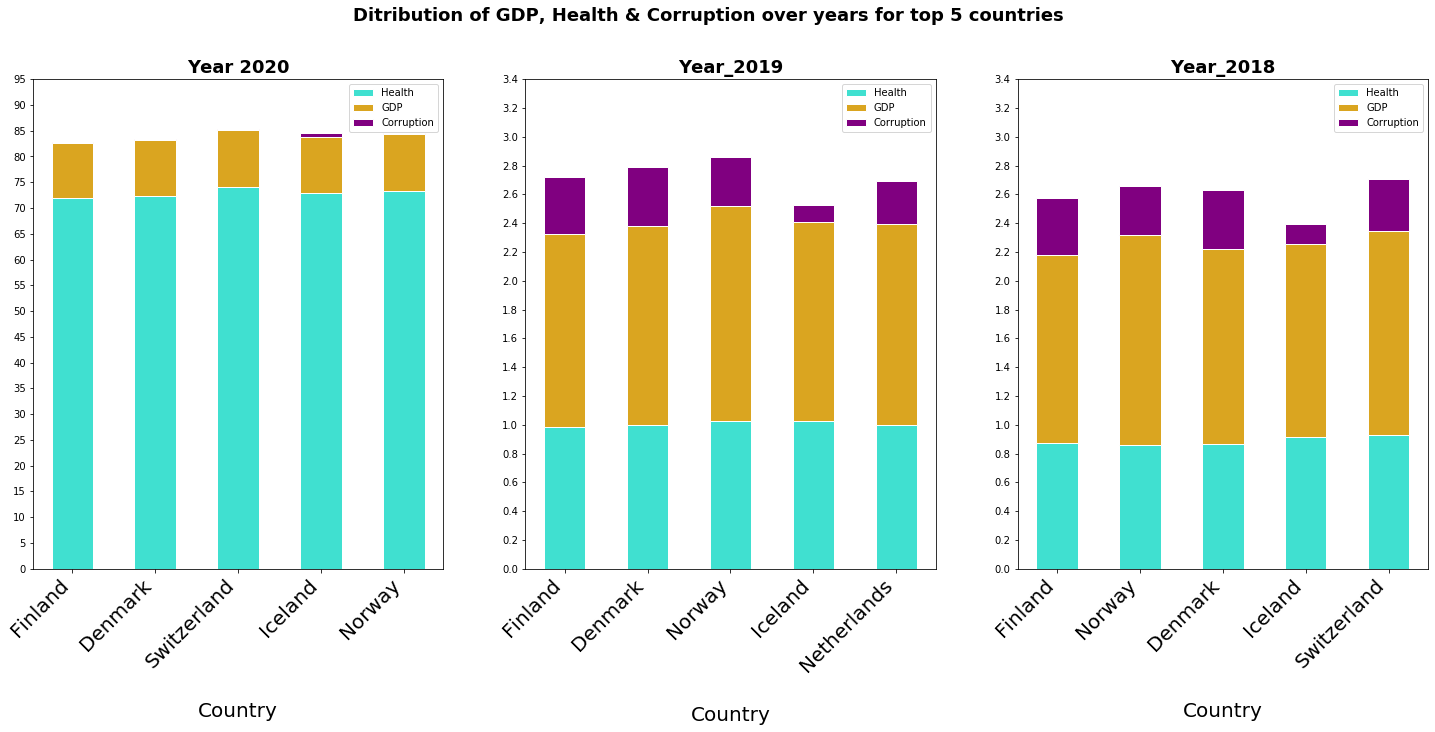

In [16]:
# Draw a figure with 1 row and 2 columns and set figure size
fig1,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25,10))

# Set the figure title
fig1.suptitle('Ditribution of GDP, Health & Corruption over years for top 5 countries', fontsize=18, fontweight='bold')

# Call the above function year_stackBar to plot stacked bar graph of demographics for particular year

# Stacked bar graph for Year 2020
year_stackBar(ax1, "Year 2020", top_5_2020["Country"], top_5_2020["Health_2020"], top_5_2020["GDP_per_Capita_2020"], 
              top_5_2020["Corruption_2020"], 100, 5)

# Stacked bar graph for Year 2019
year_stackBar(ax2, "Year_2019", top_5_2019["Country"], top_5_2019["Health_2019"], top_5_2019["GDP_per_Capita_2019"], 
              top_5_2019["Corruption_2019"], 3.5, 0.2)

# Stacked bar graph for Year 2018
year_stackBar(ax3, "Year_2018", top_5_2018["Country"], top_5_2018["Health_2018"], top_5_2018["GDP_per_Capita_2018"],
              top_5_2018["Corruption_2018"], 3.5, 0.2)

# Rotate xticks at 45 degrees
fig1.autofmt_xdate(rotation=45)

# Save fig
fig1.savefig("Plot_Images/Top5_stackedBar.png")

# Display Plot
plt.show()

#### Bottom 5 countries

In [17]:
# Sort the data frame by Happiness score in particular year in descending order and get the bottom 5 countries for that year.
bottom_5_2020 = merged_data.sort_values(by=["Score_2020"], ascending=False).tail(5)
bottom_5_2019 = merged_data.sort_values(by=["Score_2019"], ascending=False).tail(5)
bottom_5_2018 = merged_data.sort_values(by=["Score_2018"], ascending=False).tail(5)

# Get only required columns for that year in dataframe
bottom_5_2020 = bottom_5_2020[["Country", "Region", "Score_2020", "GDP_per_Capita_2020", "Health_2020", "Corruption_2020"]]
bottom_5_2019 = bottom_5_2019[["Country", "Region", "Score_2019", "GDP_per_Capita_2019", "Health_2019", "Corruption_2019"]]
bottom_5_2018 = bottom_5_2018[["Country", "Region", "Score_2018", "GDP_per_Capita_2018", "Health_2018", "Corruption_2018"]]

# Display bottom 5 countries for year 2020
bottom_5_2020

,Country,Region,Score_2020,GDP_per_Capita_2020,Health_2020,Corruption_2020
139,Central African Republic,Africa,3.4759,6.625160,45.200001,0.891807
140,Rwanda,Africa,3.3123,7.600104,61.098846,0.183541
141,Zimbabwe,Africa,3.2992,7.865712,55.617260,0.810237
142,South Sudan,Africa,2.8166,7.425360,51.000000,0.763417
143,Afghanistan,Asia,2.5669,7.462861,52.590000,0.933687


In [18]:
# Display bottom 5 countries for year 2019
bottom_5_2019

,Country,Region,Score_2019,GDP_per_Capita_2019,Health_2019,Corruption_2019
140,Rwanda,Africa,3.334,0.359,0.614,0.411
138,Tanzania,Africa,3.231,0.476,0.499,0.147
143,Afghanistan,Asia,3.203,0.350,0.361,0.025
139,Central African Republic,Africa,3.083,0.026,0.105,0.035
142,South Sudan,Africa,2.853,0.306,0.295,0.091


In [19]:
# Display bottom 5 countries for year 2018
bottom_5_2018

,Country,Region,Score_2018,GDP_per_Capita_2018,Health_2018,Corruption_2018
136,Yemen,Africa,3.355,0.442,0.343,0.064
138,Tanzania,Africa,3.303,0.455,0.381,0.097
142,South Sudan,Africa,3.254,0.337,0.177,0.106
139,Central African Republic,Africa,3.083,0.024,0.010,0.038
130,Burundi,Africa,2.905,0.091,0.145,0.076


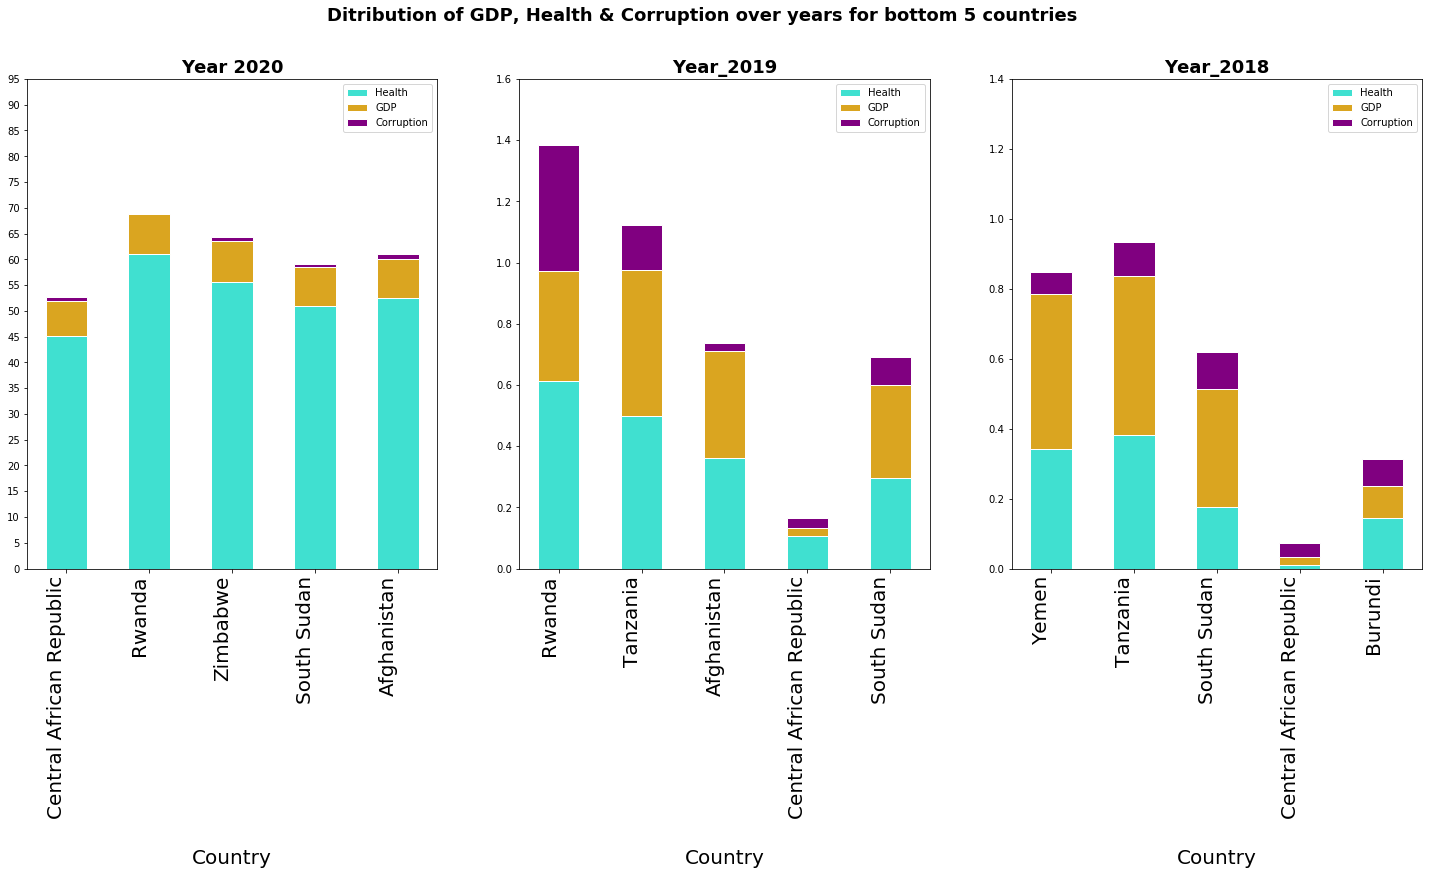

In [20]:
# Draw a figure with 1 row and 3 columns and set figure size
fig1,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25,10))

# Set figure title
fig1.suptitle('Ditribution of GDP, Health & Corruption over years for bottom 5 countries', fontsize=18, fontweight='bold')

# Call the above function year_stackBar to plot stacked bar graph of demographics for particular year for bottom 5 countries

# Stacked bar graph for Year 2020
year_stackBar(ax1, "Year 2020", bottom_5_2020["Country"], bottom_5_2020["Health_2020"], bottom_5_2020["GDP_per_Capita_2020"],
              bottom_5_2020["Corruption_2020"], 100, 5)

# Stacked bar graph for Year 2019
year_stackBar(ax2, "Year_2019", bottom_5_2019["Country"], bottom_5_2019["Health_2019"], bottom_5_2019["GDP_per_Capita_2019"],
              bottom_5_2019["Corruption_2019"], 1.8, 0.2)

# Stacked bar graph for Year 2018
year_stackBar(ax3, "Year_2018", bottom_5_2018["Country"], bottom_5_2018["Health_2018"], bottom_5_2018["GDP_per_Capita_2018"],
              bottom_5_2018["Corruption_2018"], 1.5, 0.2)

# Rotate xticks at 90 degrees
fig1.autofmt_xdate(rotation=90)

# Save fig
fig1.savefig("Plot_Images/bottom5_stackedBar.png")

# Display Plot
plt.show()

### Question 3 : Which is the most and the least Happiest Region? Are there any outliers in terms of happiness score across region over the years?

### Analysis:
* Noth America is the consistently most happiest region over the years.
* Africa is consistently least happiest region over the years.
* Region wise there is not much difference in happiness score over last 3 years.
* Africa region has most outliers over the last 3 years
* Commonwealth (Coomonweath of Independent States) & Europe region has been consistent over the last 3 years with no outliers at all.

In [21]:
# Using Matplotlib

# Create a groupby object by region
region_stat = merged_data.groupby("Region")

# Get the happiness score by region for a particular year
region_score_2020 = region_stat["Score_2020"].mean()
region_score_2019 = region_stat["Score_2019"].mean()
region_score_2018 = region_stat["Score_2018"].mean()

# Get the regions name from index values
regions_2020 = list(region_score_2020.index.values)
regions_2019 = list(region_score_2019.index.values)
regions_2018 = list(region_score_2018.index.values)

# Method to plot pie chart for happiness score by region for particular year.
# Parameters are as below:
# ax = subplot
# values = Happiness_score
# label = pie_chart label, region names
# title = sub plot title

def region_pie(ax, values, label, title):
    
    #Plot the graph
    ax.pie(values, labels = label,  autopct="%1.1f%%", shadow=True, startangle=140, rotatelabels =False, textprops={'fontsize': 16})

    # Set the font size, title & ylabel
    ax.set_title(title, pad=10, fontsize=18, fontweight='bold')
    ax.axis("equal")

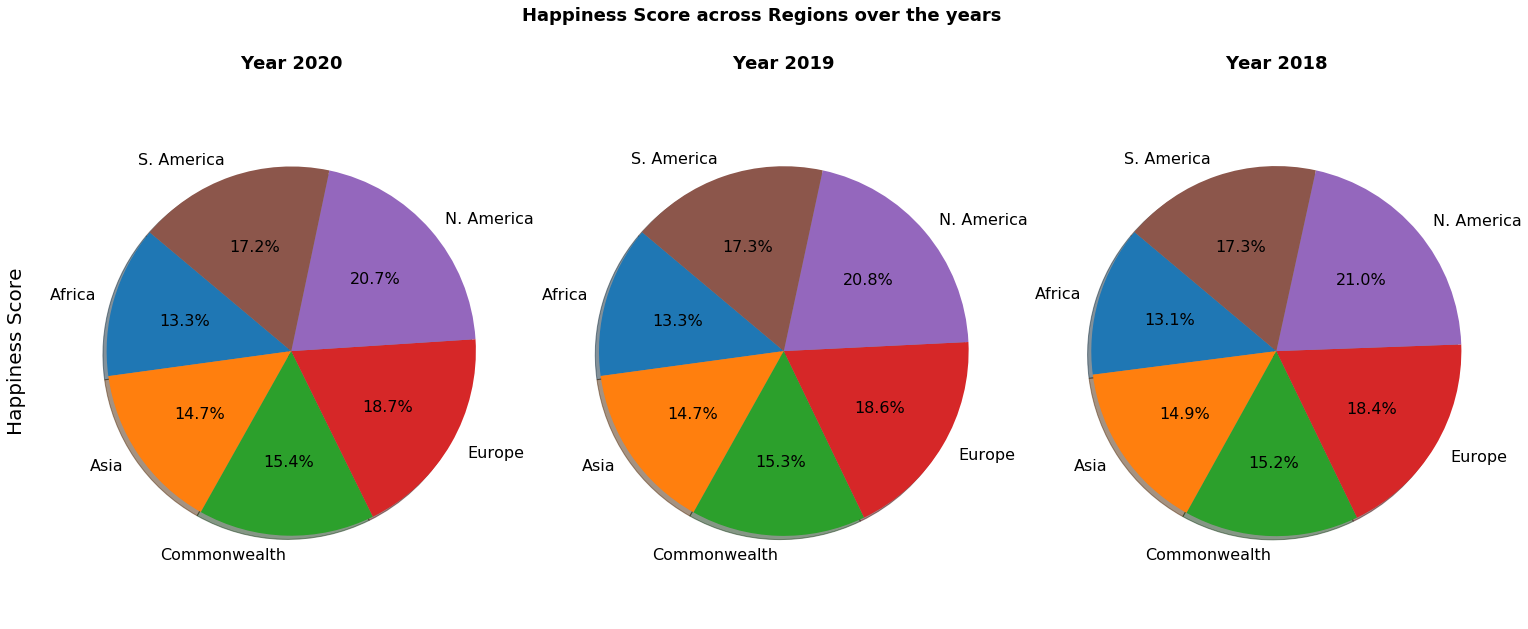

In [22]:
# Create a figure with one row and three columns and set 
fig1,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25,10))

# Set the figure title
fig1.suptitle('Happiness Score across Regions over the years', fontsize=18, fontweight='bold')

# Set the y-label
ax1.set_ylabel("Happiness Score", labelpad=60, fontsize=20)

# Call method region_pie to plot pie chart for Happiness Score across Regions over the years

# Year 2020
region_pie(ax1, region_score_2020, regions_2020, "Year 2020")
# Year 2019
region_pie(ax2, region_score_2019, regions_2019, "Year 2019")
# Year 2018
region_pie(ax3, region_score_2018, regions_2018, "Year 2018")

# Save fig
fig1.savefig("Plot_Images/Score_ocross_region_pie.png")

# Show plot 
plt.show()

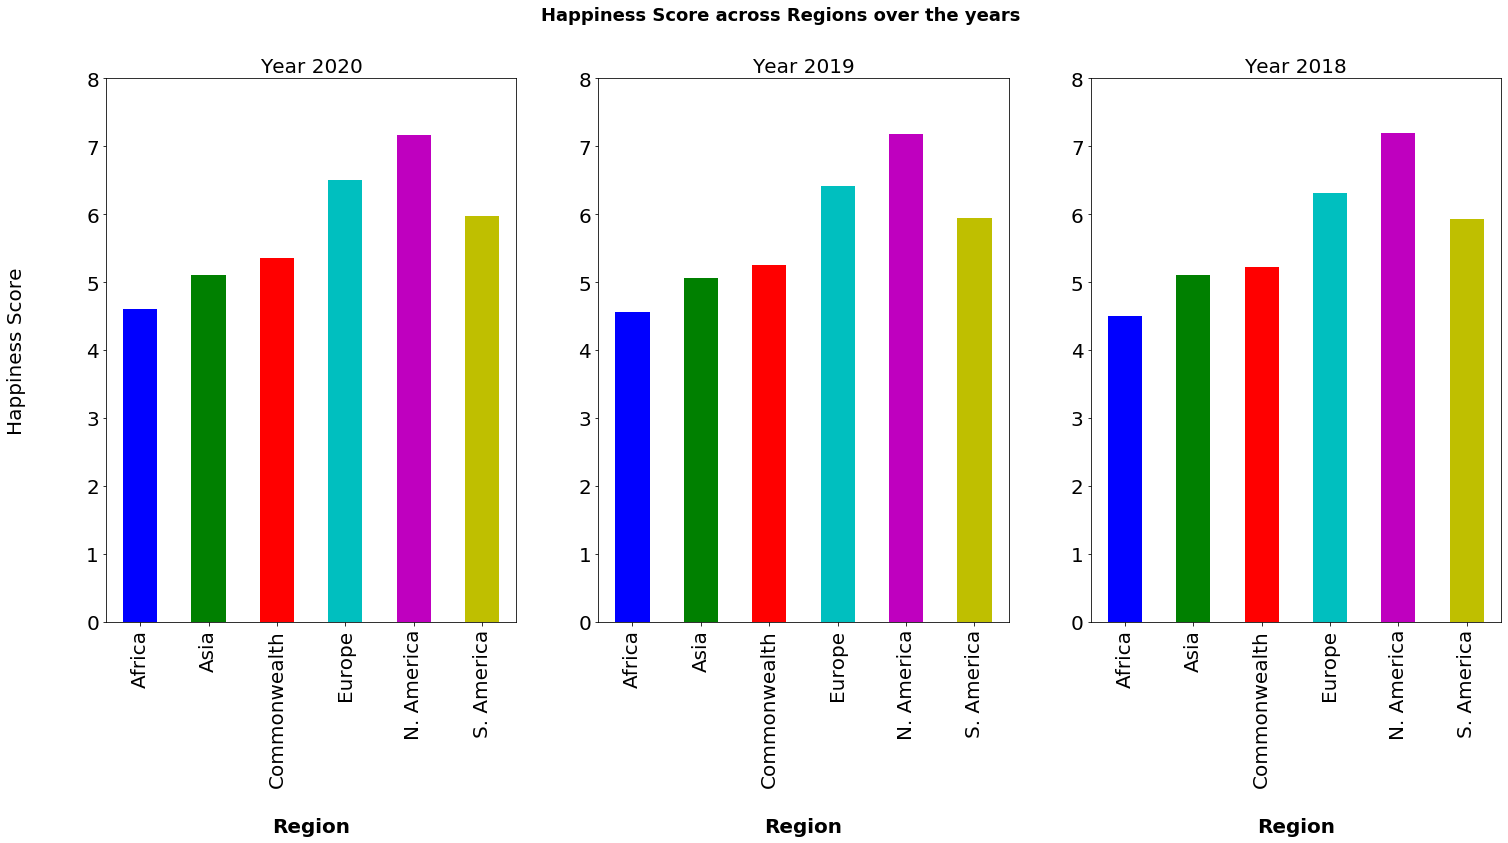

In [23]:
# Using pandas.plot i.e df.plot

# Draw a figure with one row and 3 column, set figure size
fig1,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25,10))

# Set figure titile
fig1.suptitle('Happiness Score across Regions over the years', fontsize=18, fontweight='bold')

# groupby region and get the mean of happiness score for year 2020 to plot bar graph
merged_data.groupby("Region")["Score_2020"].mean().plot(ax=ax1, kind='bar', color=tuple(['b', 'g', 'r', 'c', 'm', 'y',]),
                                                       ylim=(0,8), title = "Year 2020", fontsize = 20)

# groupby region and get the mean of happiness score for year 2019 to plot bar graph
merged_data.groupby("Region")["Score_2019"].mean().plot(ax=ax2, kind='bar', color=tuple(['b', 'g', 'r', 'c', 'm', 'y',]),
                                                        ylim=(0,8), title = "Year 2019", fontsize = 20)

# groupby region and get the mean of happiness score for year 2018 to plot bar graph
merged_data.groupby("Region")["Score_2018"].mean().plot(ax=ax3, kind='bar', color=tuple(['b', 'g', 'r', 'c', 'm', 'y',]),
                                                        ylim=(0,8), title = "Year 2018", fontsize = 20)

# Set the ylabel
ax1.set_ylabel("Happiness Score", labelpad=60, fontsize=20)

# Set the size of the title for all sub-plots
ax1.title.set_size(20)
ax2.title.set_size(20)
ax3.title.set_size(20)

# Set x-label for all sub-plots
ax1.set_xlabel("Region", labelpad=30, fontsize=20, fontweight='bold')
ax2.set_xlabel("Region", labelpad=30, fontsize=20, fontweight='bold')
ax3.set_xlabel("Region", labelpad=30, fontsize=20, fontweight='bold')

# Save fig
fig1.savefig("Plot_Images/Score_ocross_region_Bar.png")

# Show plot 
plt.show()

#### Happiness BoxPlots by Regions

In [24]:
regions = regions_2020

# Method to calculate quartiles, lower & upper bound for region specific happiness score for particular year
# Parameters as below:
# colname : column name for year specific happiness score
# Year : Year for which quartiles are being calculated

def cal_quartiles(colname, year):
    counter = 0 # counter is declared to track the first iteration

    #Iterate through list of regions
    for region in regions:
        
        # From mergerd_data df, if region name matches the one from list, add happiness score for that year to df
        region_df = merged_data.loc[merged_data["Region"] == region, colname]
        
        # Get the quartiles, Q1, Q3 & IQR of happiness score for specific region
        # Calculate lowe & upper bound to get potential outliers
        quartiles = region_df.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
    
        # Print the data received. Counter is used to print the dotted line only on top & increment counter
        if counter == 0:
            space = '                    '
            print(f"=======================================================\n{space}Year {year}")
            print("=======================================================")
            counter +=1
        print(f"The lower quartile of {region} Happiness Score is: {lowerq}")
        print(f"The upper quartile of {region} Happiness Score is: {upperq}")
        print(f"The interquartuile range of {region} Happiness Score is: {iqr}")
        print(f"The median of {region} Happiness Score is: {quartiles[0.5]}")
        print(f"Values below {lower_bound} could be outliers for {region} Happiness Score")
        print(f"Values above {upper_bound} could be outliers for {region} Happiness Score")
        print("-----------------------------------------------------------")

In [25]:
# Call method cal_quartiles to calculate quartiles, lower & upper bound for region specific happiness score for year 2020
cal_quartiles("Score_2020", 2020)

                    Year 2020
The lower quartile of Africa Happiness Score is: 4.1620498894999995
The upper quartile of Africa Happiness Score is: 5.02504980525
The interquartuile range of Africa Happiness Score is: 0.8629999157500006
The median of Africa Happiness Score is: 4.6284999845
Values below 2.8675500158749987 could be outliers for Africa Happiness Score
Values above 6.319549678875001 could be outliers for Africa Happiness Score
-----------------------------------------------------------
The lower quartile of Asia Happiness Score is: 4.8406000135000005
The upper quartile of Asia Happiness Score is: 5.782049894
The interquartuile range of Asia Happiness Score is: 0.9414498804999996
The median of Asia Happiness Score is: 5.285600185
Values below 3.428425192750001 could be outliers for Asia Happiness Score
Values above 7.19422471475 could be outliers for Asia Happiness Score
-----------------------------------------------------------
The lower quartile of Commonwealth Happiness S

In [26]:
# Call method cal_quartiles to calculate quartiles, lower & upper bound for region specific happiness score for year 2019
cal_quartiles("Score_2019", 2019)

                    Year 2019
The lower quartile of Africa Happiness Score is: 4.101500000000001
The upper quartile of Africa Happiness Score is: 4.957000000000001
The interquartuile range of Africa Happiness Score is: 0.8555000000000001
The median of Africa Happiness Score is: 4.5215
Values below 2.8182500000000004 could be outliers for Africa Happiness Score
Values above 6.240250000000001 could be outliers for Africa Happiness Score
-----------------------------------------------------------
The lower quartile of Asia Happiness Score is: 4.578
The upper quartile of Asia Happiness Score is: 5.6419999999999995
The interquartuile range of Asia Happiness Score is: 1.0639999999999992
The median of Asia Happiness Score is: 5.191
Values below 2.9820000000000015 could be outliers for Asia Happiness Score
Values above 7.237999999999998 could be outliers for Asia Happiness Score
-----------------------------------------------------------
The lower quartile of Commonwealth Happiness Score is: 5

In [27]:
# Call method cal_quartiles to calculate quartiles, lower & upper bound for region specific happiness score for year 2018
cal_quartiles("Score_2018", 2018)

                    Year 2018
The lower quartile of Africa Happiness Score is: 3.99025
The upper quartile of Africa Happiness Score is: 4.812250000000001
The interquartuile range of Africa Happiness Score is: 0.8220000000000005
The median of Africa Happiness Score is: 4.432499999999999
Values below 2.757249999999999 could be outliers for Africa Happiness Score
Values above 6.045250000000001 could be outliers for Africa Happiness Score
-----------------------------------------------------------
The lower quartile of Asia Happiness Score is: 4.4855
The upper quartile of Asia Happiness Score is: 5.6995000000000005
The interquartuile range of Asia Happiness Score is: 1.2140000000000004
The median of Asia Happiness Score is: 5.103
Values below 2.6644999999999994 could be outliers for Asia Happiness Score
Values above 7.520500000000001 could be outliers for Asia Happiness Score
-----------------------------------------------------------
The lower quartile of Commonwealth Happiness Score is: 

In [28]:
# Methd to plot box plots for region wise happiness score over years
# Parameters are as below:
# colname : column name for year specific happiness score
# Year : Year for which quartiles are being calculated

def boxPlot_region(colname, year):

    # Create list of an empty lists which would contain the happiness score by region for every region
    score_by_region = [[] for i in range(len(regions))]

    # region list created above is as below with their indices:
    # 0 - Africa, so add Happiness Scoree for this region at index 0 of list score_by_region
    # 1 - Asia, so add Happiness Scoree for this region at index 1 of list score_by_region
    # 2 - Commonwealth, so add Happiness Scoree for this region at index 2 of list score_by_region
    # 3 - Europe, so add Happiness Scoree for this region at index 3 of list score_by_region
    # 4 - N. America, so add Happiness Scoree for this region at index 4 of list score_by_region
    # 5 - S. America, so add Happiness Scoree for this region at index 5 of list score_by_region

    # Iterate through a dataframe
    for i in range(len(merged_data)):
        
        # With iloc methd get the region & Happiness score from each row
        region = merged_data.iloc[i,:]["Region"]
        score = round(merged_data.iloc[i,:][colname],3)
        
        # Iterate through a list of regions with index
        for j in range(len(regions)):
            
            # If region from list matches with the region from data frame, 
            # add score to list with same index inside a list
            if region == regions[j]:
                score_by_region[j].append(score)


    # Plot Boxplots:
    # To plot boxplots for all regions in same figure, declard axs as array with one row and six columns,
    fig1,axs = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(15,8))

    #Set title for the figure
    fig1.suptitle(f'Happiness Score across Regions in year {year}', fontsize=18, fontweight='bold')

    # Set Y lable
    axs[0].set_ylabel("Happiness Score", labelpad=20, fontsize=15)
    axs[0].set_ylim(2,8)

    # Declare a list of colors
    colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red']
    
    # Set the title, draw boxplots with region & Happiness Score list and set xticks to empty list 
    for i in range(len(regions)):
        axs[i].set_title(regions[i])
        box = axs[i].boxplot(score_by_region[i], patch_artist=True)
        axs[i].set_xticks([])
        plt.setp(box["boxes"], facecolor=colors[i])
    
    # Save fig
    fig1.savefig(f"Plot_Images/Region_Score_boxPlot_{year}.png")
    
    #Display plot
    plt.show()

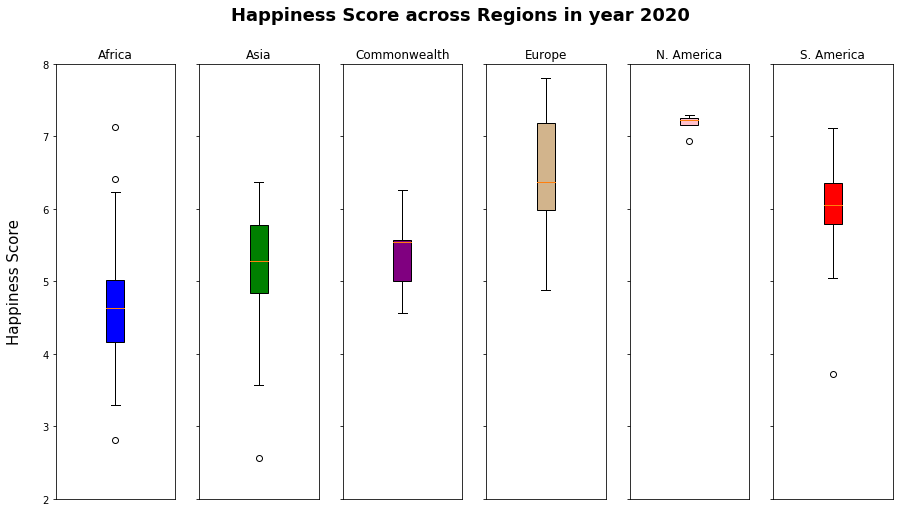

In [29]:
# Call method boxPlot_region to plot for year 2020
boxPlot_region("Score_2020", 2020)

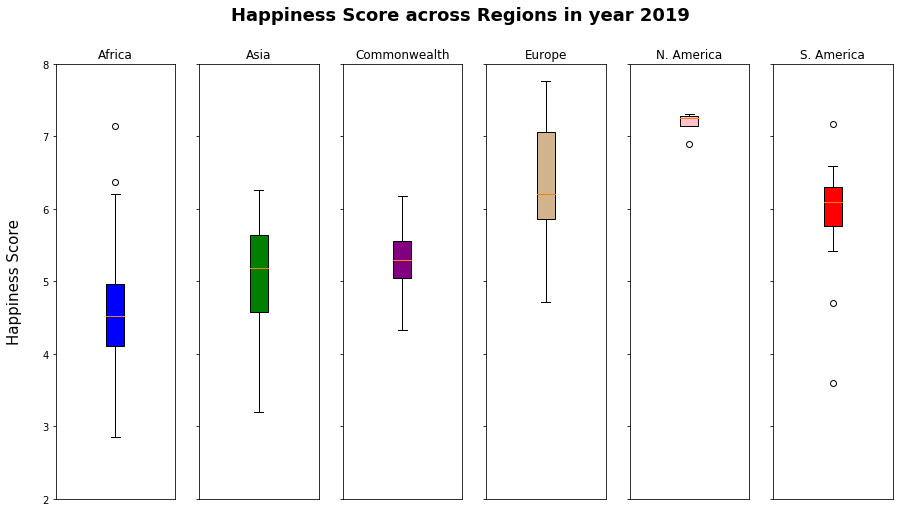

In [30]:
# Call method boxPlot_region to plot for year 2019
boxPlot_region("Score_2019", 2019)

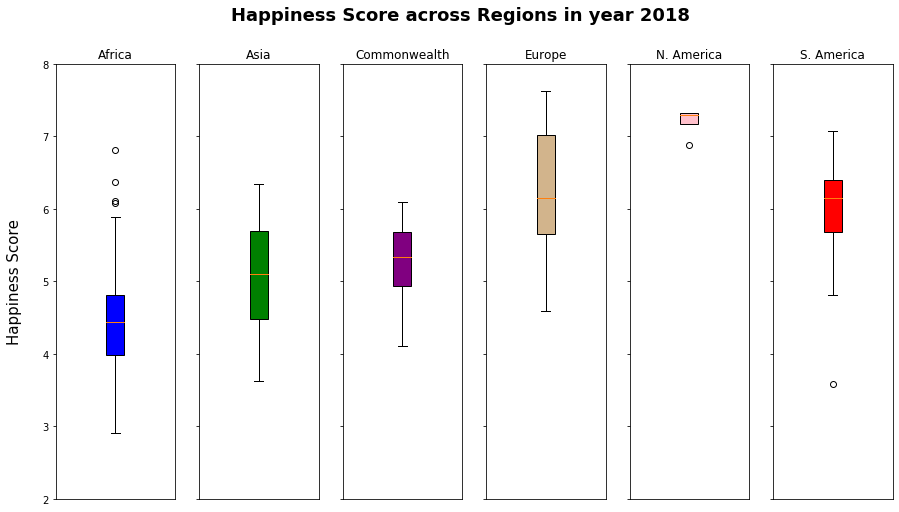

In [31]:
# Call method boxPlot_region to plot for year 2018
boxPlot_region("Score_2018", 2018)

### Question 4: Which country experiences a significant increase or decrease in happiness?

### Analysis

* The country that experienced a significant increase in happiness is Benin, Africa. There is a moderate increase after calcualting the delta score is 1.075.

* Afghanistan has experienced a significant decline over the years furthersome, after calculating the delta score, the country is, scoring -1.0651.

In [32]:
# Creating a df for calculating the delta score over the years.
delta_data = pd.DataFrame(merged_data,columns = ['Country','Region','Score_2018', 'Score_2019', 'Score_2020'])
delta_data 

delta_data['Delta Cal'] = (delta_data['Score_2019']-delta_data['Score_2018']) + (delta_data['Score_2020']-delta_data['Score_2019'])

delta_data= delta_data.sort_values(by=['Delta Cal'], ascending=False)

Top_HappinessScore = delta_data.head(1)
Low_HappinessScore = delta_data.tail(1) 
delta_data



,Country,Region,Score_2018,Score_2019,Score_2020,Delta Cal
81,Benin,Africa,4.141,4.883,5.2160,1.0750
116,Liberia,Africa,3.495,3.975,4.5579,1.0629
95,Guinea,Africa,3.964,4.534,4.9493,0.9853
130,Burundi,Africa,2.905,3.775,3.7753,0.8703
96,Niger,Africa,4.166,4.628,4.9096,0.7436
...,...,...,...,...,...,...
134,India,Asia,4.190,4.015,3.5733,-0.6167
131,Zambia,Africa,4.377,4.107,3.7594,-0.6176
129,Sierra Leone,Africa,4.571,4.374,3.9264,-0.6446
77,Malaysia,Asia,6.322,5.339,5.3843,-0.9377


In [33]:
# Top country with High Happiness Score
Top_HappinessScore

,Country,Region,Score_2018,Score_2019,Score_2020,Delta Cal
81,Benin,Africa,4.141,4.883,5.216,1.075


In [34]:
# Bottom country with lowest Happiness Score
Low_HappinessScore

,Country,Region,Score_2018,Score_2019,Score_2020,Delta Cal
143,Afghanistan,Asia,3.632,3.203,2.5669,-1.0651


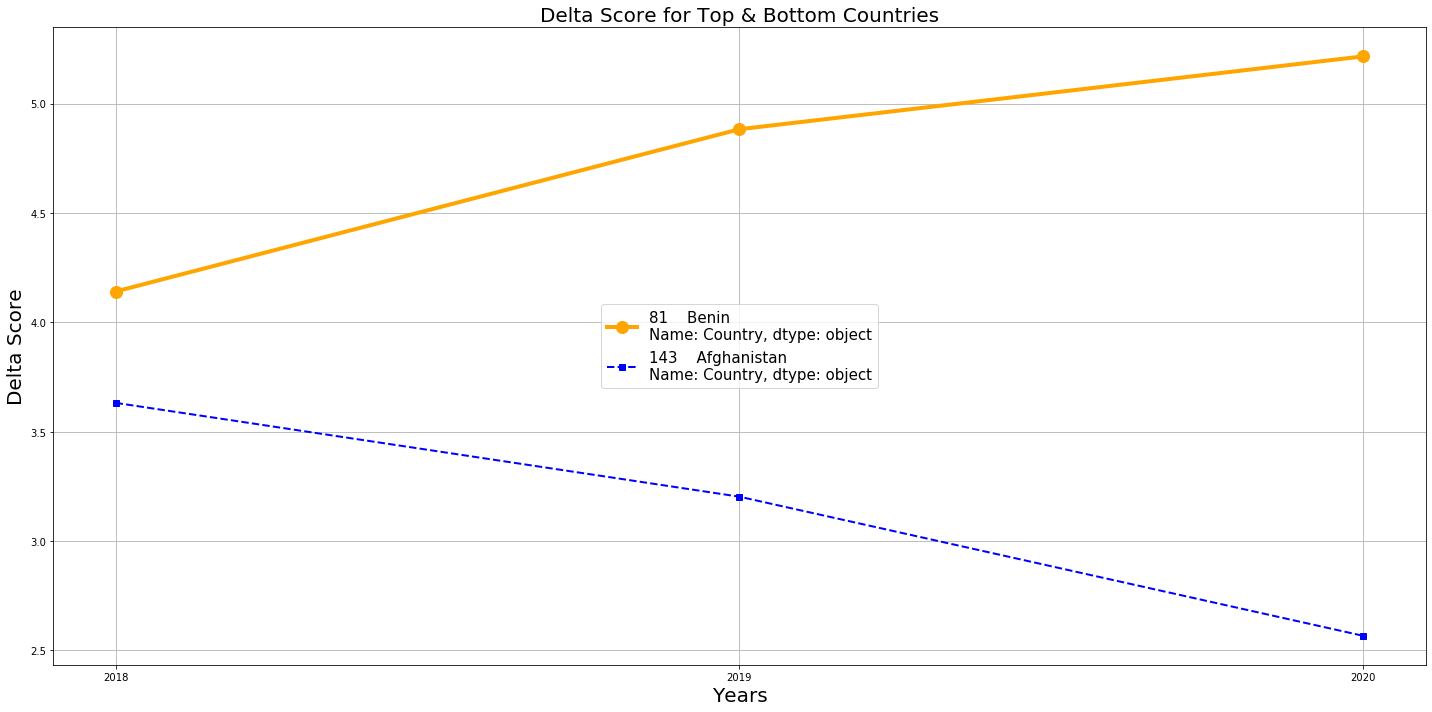

In [35]:
# Declaring variables for plotting the graph

year = ['2018','2019','2020']
Top_Score = [Top_HappinessScore['Score_2018'],Top_HappinessScore['Score_2019'],Top_HappinessScore['Score_2020']]
Low_Score = [Low_HappinessScore['Score_2018'],Low_HappinessScore['Score_2019'],Low_HappinessScore['Score_2020']]

top_label=Top_HappinessScore['Country']
bottom_label=Low_HappinessScore['Country']

#Adjusting the figure size
plt.figure(figsize=(20,10))

Top_Plot, = plt.plot(year,Top_Score , color="orange", marker ='o',markersize=12,label=top_label,linewidth=4,)
Low_Plot, = plt.plot(year, Low_Score, color="blue",marker ='s', linewidth=2, linestyle='dashed',label=bottom_label)

#Labels 

plt.title('Delta Score for Top & Bottom Countries', fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Delta Score',fontsize=20)
plt.legend(loc="center",prop={"size":15})
plt.tight_layout()
plt.savefig("Plot_Images/Delta Score.png")
plt.grid()

